# Worksheet Mini Bootcamp Mata Kuliah Basisdata

### Disclaimer!!!

Beberapa modul yang digunakan diantaranya adalah numpy dan pandas, dimana didalam kedua library tersebut juga terdapat fungsi-fungsi serupa dengan query SQL.

Contoh:
- untuk mengelompokkan data, pada pandas terdapat fungsi `groupby(<nama kolom>)`, juga pada SQL terdapat `GROUP BY <nama kolom>`
- untuk filtering data, pada numpy terpadapat fungsi `where(<kondisi>)`, juga pada SQL terdapat `WHERE <kondisi>` 
- dll

Pada kasus ini dan jika memungkinkan, disarankan untuk menggunakan query SQL. Selain untuk tujuan **proses pembelajaran**, pengolahan data menggunakan SQL **lebih cepat** dibandingkan hanya menggunakan python.

### Import library

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mysql.connector as connector
from mysql.connector import Error

### Koneksi ke database `university`

In [180]:
try:
    conn = connector.connect(host = "localhost", user = "root", password = "maftuh2003", database = "university")

    if conn.is_connected():           # cek apakah sudah terkoneksi
        print("MySQL is connected")
        cursor = conn.cursor()        # membuat cursor untuk eksekusi query pada proses2 berikutnya

except Error as e:
    print("Error while connecting to MySQL", e)

MySQL is connected


***

### Melakukan "query" ke database
Terdapat beberapa cara:
1. menggunakan `cursor`
2. langsung menggunakan modul `pandas`

#### 1. Menggunakan cursor
<pre>
conn = connector.connect(...)
cursor = conn.cursor()
cursor.execute("SELECT * FROM ... ")
result = cursor.fetchall()
print(result)
</pre>

#### 2. Menggunakan pandas
<pre>
conn = connector.connect(...)
df = pd.read_sql("SELECT * FROM ... ", con = conn)
df.head()
</pre>

***

### Tables 

In [181]:
query = "SHOW TABLES"
pd.read_sql(query, con = conn)

,Tables_in_university
0,advisor
1,classroom
2,course
3,department
4,instructor
5,prereq
6,section
7,student
8,takes
9,teaches


### ERD
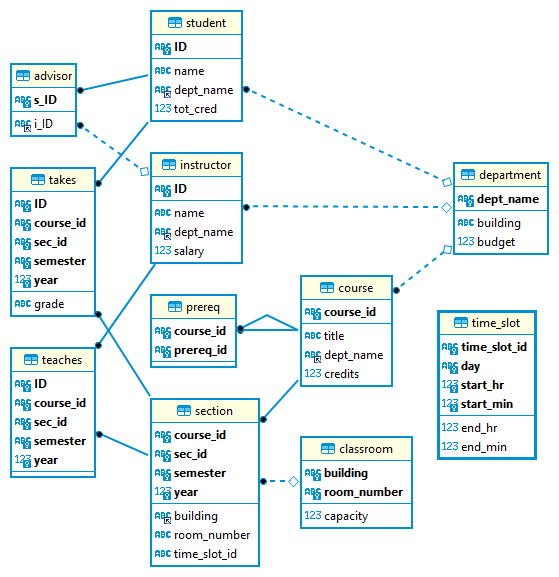

### Table Student

In [4]:
query = "SELECT * FROM student"
cursor.execute(query)
result = cursor.fetchall()
pd.DataFrame(result, columns=['ID', 'name', 'dept_name', 'total_cred']).head()

## Kekurangan menggunakan cursor adalah code terlalu panjang
## dan tipe data yang seharusnya numerik masih bertipe data string

,ID,name,dept_name,total_cred
0,1000,Manber,Civil Eng.,39
1,10033,Zelty,Mech. Eng.,60
2,10076,Duan,Civil Eng.,105
3,1018,Colin,Civil Eng.,81
4,10204,Mediratta,Geology,112


In [5]:
query = "SELECT * FROM student"
pd.read_sql(query, con = conn).head()

,ID,name,dept_name,tot_cred
0,1000,Manber,Civil Eng.,39.0
1,10033,Zelty,Mech. Eng.,60.0
2,10076,Duan,Civil Eng.,105.0
3,1018,Colin,Civil Eng.,81.0
4,10204,Mediratta,Geology,112.0


## 1. jumlah siswa di setiap jurusan 

## 2. siswa yang paling banyak mengambil sks/matakuliah

## 3. siswa yang memiliki nilai terbesar/terkecil

## 4. rata-rata nilai siswa di setiap matakuliah/jurusan

## 5. rata-rata gaji dosen dan mengajar di berapa matakuliah

## 6. matakuliah yg paling diminati di setiap jurusan

## 7. jumlah matakuliah di masing-masing jurusan


## 8. waktu (kosong/full) di masing-masing ruangan